# <a id='toc1_'></a>[Geometry Optimisation](#toc0_)

1. **A. Maghamé Foumkpou**, aissatou.maghame@facsciences-uy1.cm
     * Department of Physics, Faculty of Science, University of Yaoundé I
2. **J-P. Tchapet Njafa**, jean-pierre.tchapet-njafa@univ-maroua.cm
    * Department of Physics, Faculty of Science, University of Yaoundé I

December 2024

## Introduction

L'**optimisation de la structure géométrique** consiste à ajuster la géométrie d'une molécule afin de trouver une structure présentant l'énergie la plus basse possible. Cette structure optimisée correspond généralement à une configuration stable, représentant soit un minimum local (une espèce stable) soit un état de transition (une configuration à haute énergie entre deux espèces stables). Celle-ci permet d'obtenir une meilleure concordance entre les calculs théoriques et les mesures expérimentales.  

Dans ce tutoriel, nous utilisons les modules suivants :

 
* [RDKit](https://github.com/rdkit) (Open-Source Cheminformatics Software),
* [xTB](https://xtb-docs.readthedocs.io/en/latest/) (Semiempirical Extended Tight-Binding Program Package) et
* [CREST](https://xtb-docs.readthedocs.io/en/latest/) (Conformer-Rotamer Ensemble Sampling Tool based on the xtb Semiempirical Extended Tight-Binding Program Package) : des outils de chimie computationnelle et de modélisation moléculaire.

### Voici un aperçu de ce que fait chacun de ces modules :


**RDKit**  :
* Représentation et manipulation de molécules et de bases de données de composés chimiques ;
* Calcul de descripteurs moléculaires.
* Génération et optimisation de conformations.
* Prédiction de propriétés physico-chimiques et biologiques.           

**XTB**  :
* Calcul d'optimisation de géométrie et d'énergie de molécules;
* Simulation de structures électroniques (orbitales moléculaires, charges partielles, etc.);
* Calcul de propriétés thermodynamiques (enthalpie, entropie, énergie libre);
* Analyse vibrationnelle (fréquences de vibration, modes normaux);
* Modélisation de réactions chimiques et de mécanismes réactionnels.

**CREST**  :
* Génération d'ensembles de conformères de molécules flexibles ;
* Optimisation et ranking des conformères en fonction de leur énergie ;
* Prise en compte des effets conformationnels dans l'analyse de structures et de propriétés; 
* Intégration avec d'autres logiciels de modélisation moléculaire (par exemple, RDKit, XTB).

Ces trois modules sont très utilisés dans divers domaines de la chimie computationnelle, tels que la découverte de médicaments, la conception moléculaire, la chimie théorique, l'analyse structurale et la prédiction de propriétés.

L'objectif de ce tutoriel est d'optimiser une molécule organique hétérocyclique qui appartient à la classe des oxazoles, le **1,2-oxazole (C<sub>3</sub>H<sub>3</sub>NO)**  à partir de son SMILES (`C1=CON=C1`), d'extraire le **gap HOMO-LUMO**, puis d'effectuer les calculs HF et DFT.


# Plan de travail

## Répertoire de sauvegarde des fichiers
## Représenter la structure géométrique initiale avec RDKit 
* 2D
* 3D non optimisée
* 3D pré-optimisée avec MMFF94s

## Utilisation des outils xTB, CREST
### Pré-optimisation avec xTB sur la molécule optimisée par RDKit
* Sauvegarde de la structure pré-optimisée
* Visualisation

### Recherche du meilleur conformère avec CREST

### Optimisation avec xTB sur le meilleur conformère de la molécule

### Extraction du gap HOMO-LUMO


## Écart quadratique moyen entre les positions des atomes (RMSD) et interprétation 



### La molécule utilisée pour ce travail est: 1,2-oxazole

Généralement sous forme de liquide incolore à température ambiante, **1,2-oxazole** est un composé organique hétérocyclique qui appartient à la classe des oxazoles. Il peut également être obtenu sous forme solide cristalline et est constitué d'un anneau à cinq atomes comportant deux atomes d'azote (N) et un atome d'oxygène (O), qui sont reliés aux atomes de carbone adjacents. La formule chimique du 1,2-oxazole est **C<sub>3</sub>H<sub>3</sub>NO**.

## Répertoire de sauvegarde des fichiers

In [1]:
from pathlib import Path  #Pour manipuler les chemins de fichiers de manière plus pratique

In [2]:
# Verify if the "data" subdirectory exist and if not, create it

data_dir = Path('./dataGeo_opt')  # Cette ligne crée un objet Path représentant le chemin du sous-répertoire 'dataxTB' dans le répertoire courant (.)
data_dir.mkdir(exist_ok=True)


La ligne `data_dir.mkdir(exist_ok=True)` vérifie si le répertoire `dataxTB` existe déjà. Si ce n'est pas le cas, elle crée ce répertoire.

La méthode `mkdir()` du module pathlib. Path permet de créer un nouveau répertoire et l'argument `exist_ok=True` indique que si le répertoire existe déjà, la méthode ne lève pas d'erreur et continue simplement.

## Représentation la structure géométrique initiale à partir de son SMILES (Simplified Molecular Input Line Entry System) `C1=CON=C1` avec RDKit 

In [3]:
#  Importons les modules et classes nécessaires

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem import MolFromSmiles, Descriptors 

rdkit.__version__

'2024.03.6'

### 2D

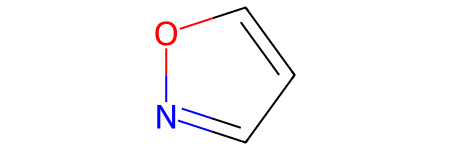

In [4]:
smile = 'C1=CON=C1' # Carbazole 
smi_key = 'Oxazole'

# Defines a molecule from its SMILES string
mol_rdkitNop = Chem.MolFromSmiles(smile)
mol_rdkitNop

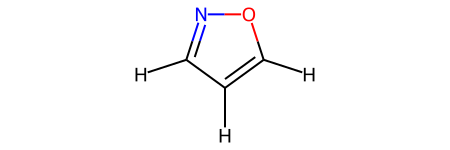

In [5]:
# Add explicit Hs
mol_rdkitNop= AllChem.AddHs(mol_rdkitNop) 
mol_rdkitNop

### Descripteurs

In [6]:
from rdkit.Chem import Descriptors

molwt = Descriptors.ExactMolWt(mol_rdkitNop)
logP = Descriptors.MolLogP(mol_rdkitNop)
tpsa = Descriptors.TPSA(mol_rdkitNop)
Polarity = Descriptors.TPSA(mol_rdkitNop)
Solubility = Descriptors.MolLogP(mol_rdkitNop)
hbd = Descriptors.NumHDonors(mol_rdkitNop)
hba = Descriptors.NumHAcceptors(mol_rdkitNop)

print(f'Some molecular properties are :\n Molecular weight:{molwt}, \n polarity:{tpsa}, \n solubility:{logP}, \n Hbd:{hbd}, \n Hba:{hba}')  

Some molecular properties are :
 Molecular weight:69.021463716, 
 polarity:26.03, 
 solubility:0.6746, 
 Hbd:0, 
 Hba:2


### Visualisation 3D de la structure non optimisée

In [7]:
# For 3D plotting
import py3Dmol

py3Dmol.__version__

'2.0.4'

In [8]:
# Verify if the "./dataGeo_opt{smi_key}" subdirectory exist and if not, create it
working_dir = Path(f'{data_dir}/{smi_key}')

# Create the output directory if it doesn't exist
working_dir.mkdir(parents=True, exist_ok=True)

#Checking
working_dir

PosixPath('dataGeo_opt/Oxazole')

In [9]:
# Fonction défini pour aider à la visualisation 3D
def view3D(mol, label, fmt='mol'):
        """3D vizualisation of mol/xyz file with Py3DMol
        """

        view = py3Dmol.view(width=400, height=400)

        if fmt=='mol':
            view.addModel(Chem.MolToMolBlock(mol), fmt)
            # view.addModel(mol, fmt)
        elif fmt=='xyz':
            view.addModel(mol, fmt)

        view.setStyle({'stick': {}, 'sphere': {'scale': .30}})
        view.addLabel(label, {'position': {'x': -2, 'y': -3, 'z': 0}})

        view.zoomTo()
        view.show()

In [10]:
# Add explicit Hs
mol_rdkitNop3D = Chem.AddHs(mol_rdkitNop)

# Generates the initial 3D conformation of the molecule
AllChem.EmbedMolecule(mol_rdkitNop3D) # génére une conformation 3D à partir d'une représentation 2D d'une molécule

# 3D visualization
view3D(mol_rdkitNop3D, f'{smi_key}_3D_Nop')

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Conversion du format de données (la molécule RDKit) vers un autre format xyz

In [11]:
# Sauvegarde de cette structure non optimisée dans un fichier .xyz
path_rdkitNop_xyz = working_dir / f'{smi_key}_rdkitNop.xyz'

# Convert RDKit molecule to XYZ format 
mol_xyzNop0 = Chem.MolToXYZBlock(mol_rdkitNop3D)

with open(path_rdkitNop_xyz, "w") as f:
    f.write(mol_xyzNop0)

In [12]:
print(f'{mol_xyzNop0}')

8

C      0.000239    0.731375   -0.001986
C     -1.098566   -0.106954   -0.048413
O     -0.663602   -1.342027   -0.025757
N      0.636611   -1.360792    0.031938
C      1.125910   -0.092628    0.050169
H     -0.024063    1.798740   -0.005971
H     -2.146540    0.157849   -0.095596
H      2.170011    0.214436    0.095616



In [13]:
# Si l'on veut utiliser cette structure pour un calcul DFT, on retire les deux premières ligne

mol_xyz0 = '\n'.join(mol_xyzNop0.strip().split('\n')[2:])

print(mol_xyz0)

C      0.000239    0.731375   -0.001986
C     -1.098566   -0.106954   -0.048413
O     -0.663602   -1.342027   -0.025757
N      0.636611   -1.360792    0.031938
C      1.125910   -0.092628    0.050169
H     -0.024063    1.798740   -0.005971
H     -2.146540    0.157849   -0.095596
H      2.170011    0.214436    0.095616


## Pré-optimisation avec MMFF94s et visualisation de la structure 3D


**Champs de force empiriques** :
* AMBER (Assisted Model Building with Energy Refinement): Développé pour les biomolécules (protéines, acides nucléiques), mais aussi utilisé pour d'autres molécules organiques;
* CHARMM (Chemistry at HARvard Macromolecular Mechanics): Initialement développé pour les biomolécules, mais étendu à d'autres systèmes;
* OPLS (Optimized Potentials for Liquid Simulations): Optimisé pour la simulation de liquides et de solutions;
* UFF (Universal Force Field): Champ de force généraliste, applicable à une large gamme de molécules.

**Champs de force semi-empiriques**:
* MMFF (Merck Molecular Force Field): Famille de champs de force développés par Merck, avec différentes variantes comme MMFF94 et MMFF94s;
* CFF (Consistent Force Field): Champ de force développé pour les molécules organiques;
* MM3/MM4: Versions améliorées du champ de force MM2 original.

**Champs de force ab initio**:
* AMOEBA (Atomic Multipole Optimized Energetics for Biomolecular Applications): Champ de force polarisable, avec une meilleure description des interactions électrostatiques
* QM/MM (Quantum Mechanics/Molecular Mechanics): Approche hybride combinant des méthodes de mécanique quantique (QM) et de mécanique moléculaire (MM).

Nous utilisons une méthode d'optimisation basée sur le champs de force **MMFF94s** car très performant, parametré specifiquement pour les molecules organiques et largement utilisé en chimie computationnelle, grâce à sa précision améliorée et à son domaine d'application étendu.

In [14]:
# Optimizes the 3D conformation of the molecule using MMFF - Merck Molecular Force Field
mol_rdkitOp3D = mol_rdkitNop3D
AllChem.MMFFOptimizeMolecule(mol_rdkitOp3D, maxIters = 450, mmffVariant = "MMFF94s")

#Canonicalize the orientation of the conformation
Chem.rdMolTransforms.CanonicalizeMol(mol_rdkitOp3D, normalizeCovar=True, ignoreHs=False)

# 3D visualization
view3D(mol_rdkitOp3D, f'{smi_key} RDKit Molecule MMFF94s')

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [15]:
# Sauvegarde de cette structure non optimisée dans un fichier .xyz
path_rdkitOp_xyz = working_dir / f'{smi_key}_rdkitOp.xyz'

# Convert RDKit molecule to XYZ format 
mol_xyzOp0 = Chem.MolToXYZBlock(mol_rdkitOp3D)

with open(path_rdkitOp_xyz, "w") as f:
    f.write(mol_xyzOp0)

In [16]:
print(f'{mol_xyzOp0}')

8

C     -0.014374    0.781778   -0.000003
C     -1.093227   -0.063202    0.000001
O     -0.663568   -1.350275   -0.000003
N      0.723247   -1.369134   -0.000002
C      1.091846   -0.085769   -0.000001
H     -0.025098    1.860610   -0.000003
H     -2.164534    0.071505    0.000005
H      2.145709    0.154488    0.000005



In [17]:
mol_xyz1 = '\n'.join(mol_xyzOp0.strip().split('\n')[2:])

print(mol_xyz1)

C     -0.014374    0.781778   -0.000003
C     -1.093227   -0.063202    0.000001
O     -0.663568   -1.350275   -0.000003
N      0.723247   -1.369134   -0.000002
C      1.091846   -0.085769   -0.000001
H     -0.025098    1.860610   -0.000003
H     -2.164534    0.071505    0.000005
H      2.145709    0.154488    0.000005


## Calcul du RMSD (Root Mean Square Deviation) 
C'est une mesure statistique qui quantifie la différence moyenne entre deux conformations d'une même molécule ou entre une structure expérimentale et une structure prédite.

In [18]:
# Calculate the RMSD to evaluate the optimally (minimum RMSD) alignment of mol_rdkit0  with mol_rdkit1 
AllChem.AlignMol(mol_rdkitNop3D, mol_rdkitOp3D) # obtenir une correspondance 

0.0

In [19]:
AllChem.AlignMol(AllChem.MolFromXYZBlock(mol_xyzNop0),AllChem.MolFromXYZBlock(mol_xyzOp0))

0.059407921868628956

* Le **RMSD inférieur à 0.1 Å** alors une très faible différence géométrique entre les conformères. Cela signifie que les conformères sont très similaires d'un point de vue structural.
* On note une grosse dispersion entre les deux structures moléculaire. 

## Optimisation de la structure 3D avec xTB et CREST

**xtb** implémente des méthodes de calcul quantique semi-empiriques avancées, telles que GFN1-xTB, GFN2-xTB et IPEA-xTB qui permettent d'effectuer des calculs d'énergie, d'optimisation de géométrie, de fréquences vibrationnelles et d'autres propriétés moléculaires de manière rapide et efficace.

![Bon_xtb.jpeg](attachment:1b6be95c-a375-433a-8b5f-f70c87251aee.jpeg)

**CREST** optimise les conformères générés en minimisant leur énergie et en éliminant les structures redondantes ou non-physiques. Cela conduit à un ensemble réduit de conformères stables et représentatifs.


In [20]:
#  Common packages
import os
import sys
from sys import exit
from pathlib import Path
import subprocess as sp

In [21]:
#Fonction pour nettoyer les fichiers de calcul
def clean_xtb_files():
        #---------------------------------------------------------------------
        # Clean up output files from xtb, xtb-stda and CREST processes
        #FIXME To call after each xtb function
        #---------------------------------------------------------------------
        sp.run(['rm', 'bondlengths', 'charges', 'coord', 'coord.original', 'cregen_0.tmp','spec.dat','rots.dat',
                'cregen_1.tmp', 'cre_members', 'crest_best.xyz', 'crest_conformers.xyz', 'vibspectrum', 'hessian', 'g98.out',
                'crest.energies', 'crest_rotamers.xyz', 'gfnff_charges', 'gfnff_topo', 'wfn.xtb', 'xtbhess.xyz',
                '.history.xyz', 'struc.xyz', 'wbo', 'xtbopt.xyz', 'xtbopt.log', '.xtboptok', 'crest_property.xyz',
                'xtbrestart', 'xtbtopo.mol', 'xtblast.xyz', 'gfnff_adjacency', '.UHF', 'tda.dat',
                'ensemble_energies.log', 'charges3', 'charges', 'molden.input', 'crest_0.mdrestart',
                'crest_dynamics.trj', 'crestopt.log', 'crest.restart', 'crest_input_copy.xyz'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
        # For folder
        sp.run(['rm', '-r', 'calculation.level.1'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)

Il est possible d'exécuter xTB en ligne, sur [atomistica](https://atomistica-online-xtb.anvil.app/).

### Vérification des versions de xTB, CREST et sTDA installées

In [22]:
try:
  import xtb, crest
except:
  %pip install xtb crest -U
  import xtb, crest

In [23]:
!xtb --version

      -----------------------------------------------------------      
     |                   =====================                   |     
     |                           x T B                           |     
     |                   =====================                   |     
     |                         S. Grimme                         |     
     |          Mulliken Center for Theoretical Chemistry        |     
     |                    University of Bonn                     |     
      -----------------------------------------------------------      

   * xtb version 6.6.1 (8d0f1dd) compiled by 'conda@1efc2f54142f' on 2023-08-01

normal termination of xtb


In [24]:
!crest --version

 
       ╔════════════════════════════════════════════╗
       ║            ___ ___ ___ ___ _____           ║
       ║           / __| _ \ __/ __|_   _|          ║
       ║          | (__|   / _|\__ \ | |            ║
       ║           \___|_|_\___|___/ |_|            ║
       ║                                            ║
       ║  Conformer-Rotamer Ensemble Sampling Tool  ║
       ║          based on the xTB methods          ║
       ║                                            ║
       ╚════════════════════════════════════════════╝
       Version 3.0.1, Mon May  6 18:43:33 UTC 2024
       commit (1782d7d) compiled by 'runner@fv-az772-53'
 
 crest 3.0.1


## Pré-optimisation avec xTB sur la molécule pré-optimisée avec RDKit

## Définition des chemins pour les fichiers xtb de pré-optimisation, les fichiers xtb d'optimisation et le fichier journal CREST

In [25]:
# Setting various paths for xtb and crest files
#pré-optimisation with xtb
path_xtb_xyzProp = working_dir / f'{smi_key}_xtb_PrOpt.xyz'
path_xtb_logProp = working_dir / f'{smi_key}_xtb_PrOpt.log'

#optimisation with xtb
path_xtb_xyzOp = working_dir / f'{smi_key}_xtb_Opt.xyz'
path_xtb_logOp = working_dir / f'{smi_key}_xtb_Opt.log'

#log for crest
path_crest_log = working_dir / f'{smi_key}_crest.log'

path_xtb_csv = working_dir / f'{smi_key}_xtb.csv'

### Pré-optimisation avec xTB sur la molécule optimisée par RDKit

## Méthodes GFN-xTB et GFN-FF

**GFN-xTB** (Geometry, Frequency, Noncovalent - xTight Binding) est une méthode semi-empirique performante pour la modélisation de propriétés moléculaires. Elle utilise des paramètres ajustés à partir de données expérimentales. Cela permet d'obtenir des résultats précis à un coût de calcul raisonnable, par rapport aux méthodes ab initio plus coûteuses.

![XTB.gif](attachment:250557e7-4446-43cc-9fbb-707daed7835a.gif)

  * Différentes variantes :
        GFN0-xTB, GFN1-xTB et GFN2-xTB sont les trois principales variantes, avec une complexité et une précision croissantes.

   * Propriétés ciblées : GFN-xTB vise à fournir des résultats fiables pour des propriétés telles que les géométries moléculaires, les fréquences de vibration, les énergies d'interaction, etc. La méthode est particulièrement adaptée pour la modélisation de systèmes moléculaires de taille moyenne à grande.
    
          
**GFN-FF**  (Geometry, Frequency, Noncovalent Force Field) est une approche hybride qui combine les avantages de GFN-xTB et des champs de force classiques, permettant la modélisation de systèmes moléculaires de grande taille.


La méthode **GFN2-xTB** se distingue par sa capacité à fournir des résultats de très haute qualité pour un coût de calcul relativement faible, la rendant particulièrement adaptée pour la modélisation de systèmes moléculaires complexes à grande échelle.

In [26]:
!xtb {path_rdkitOp_xyz} --gfn 2 --opt vtight --parallel 4 > {path_xtb_logProp}

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


* La commande ci-dessus lance une optimisation de géométrie avec la méthode GFN2-xTB, en utilisant des critères de convergence très stricts et en tirant parti du calcul parallélisé sur 2 cœurs. Les résultats de ce calcul seront enregistrés dans le fichier journal {path_xtb_logProp}.

* L'option **--opt vtight** permet de définir des critères de convergence très stricts pour l'optimisation de la géométrie moléculaire. Ces critères de convergence très stricts permettent d'obtenir une optimisation de géométrie très précise, au détriment d'un temps de calcul généralement plus long que pour une optimisation **standard (--opt tight)**.

#### Sauvegarde de la structure pré-optimisée

In [27]:
!cp xtbopt.xyz {path_xtb_xyzProp}

## Visualisation de la structure pre-optimisée par xtb

In [28]:
#Visualisation
molecule_xtb_preOp = path_xtb_xyzProp.read_text()
lines = molecule_xtb_preOp.strip().split('\n')
molecule_xtb_preOp = '\n'.join(lines[:1] + [''] + lines[2:])

view3D(molecule_xtb_preOp, f'{smi_key} Pre. Opt Molecule xTB', fmt='xyz')

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Recherche du meilleur conformère avec CREST

Le code ci-dessous lance une analyse conformationnelle avec CREST en utilisant la méthode GFN2-xTB, avec des paramètres d'échantillonnage rapides et sans vérification de la topologie de référence. Les résultats seront enregistrés dans le fichier de sortie {path_crest_log}.


{path_xtb_xyzProp} : C'est le chemin du fichier d'entrée au format XYZ contenant la structure moléculaire à analyser. 
*  --mquick : Cette option active le mode "rapide" de CREST, qui utilise des paramètres d'échantillonnage plus agressifs pour accélérer les calculs;

* --noreftopo : Cette option désactive la vérification de la topologie de référence, ce qui peut être utile lorsque la structure d'entrée n'a pas de topologie de référence connue.

* -T 2 : Cette option définit le nombre de threads (cœurs de processeur) à utiliser pour les calculs en parallèle.


In [29]:
!crest {path_xtb_xyzProp} --gfn 2 --mquick --noreftopo -T 4 {path_crest_log}

 
       ╔════════════════════════════════════════════╗
       ║            ___ ___ ___ ___ _____           ║
       ║           / __| _ \ __/ __|_   _|          ║
       ║          | (__|   / _|\__ \ | |            ║
       ║           \___|_|_\___|___/ |_|            ║
       ║                                            ║
       ║  Conformer-Rotamer Ensemble Sampling Tool  ║
       ║          based on the xTB methods          ║
       ║                                            ║
       ╚════════════════════════════════════════════╝
       Version 3.0.1, Mon May  6 18:43:33 UTC 2024
       commit (1782d7d) compiled by 'runner@fv-az772-53'
 
   Cite work conducted with this code as

   • P.Pracht, F.Bohle, S.Grimme, PCCP, 2020, 22, 7169-7192.
   • S.Grimme, JCTC, 2019, 15, 2847-2862.
   • P.Pracht, S.Grimme, C.Bannwarth, F.Bohle, S.Ehlert,
     G.Feldmann, J.Gorges, M.Müller, T.Neudecker, C.Plett,
     S.Spicher, P.Steinbach, P.Wesołowski, F.Zeller,
     J. Chem. Phys., 2024, 160, 11

### Optimisation avec xTB sur le meilleur conformère de la molécule

In [30]:
!xtb crest_best.xyz --gfn 2 --opt vtight --parallel 4 > {path_xtb_logOp}

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


In [31]:
# Sauvegarde de la structure Optimisée
!cp xtbopt.xyz {path_xtb_xyzOp}

In [32]:
#Visualisation
molecule_xtb_Op = path_xtb_xyzOp.read_text()
lines = molecule_xtb_Op.strip().split('\n')
molecule_xtb_Op = '\n'.join(lines[:1] + [''] + lines[2:])

view3D(molecule_xtb_Op, f'{smi_key} Optimized Molecule xTB', fmt='xyz')

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [33]:
# Read the XYZ file
mol_xtb_xyz = path_xtb_xyzOp.read_text()
lines =mol_xtb_xyz.strip().split('\n')
mol_xtb_xyz = '\n'.join(lines[:1] + [''] + lines[2:])

view3D(mol_xtb_xyz, f'{smi_key} xTB Molecule', fmt='xyz')

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [34]:
#Nettoyage des fichiers
clean_xtb_files()

## Calcul du RMSD (Root Mean Square Deviation) 

In [35]:
AllChem.AlignMol(AllChem.MolFromXYZBlock(mol_xyzNop0),AllChem.MolFromXYZBlock(mol_xtb_xyz))

0.05504516533212646

### Visualisation des trois structures non optimisée , pré-optimisée par RDkit et optimisée par xTB

In [36]:
# Create the viewer object
viewer = py3Dmol.view(viewergrid=(1, 3), width=300*3, height=250, linked=True)

# Add the molecules to the viewer
viewer.addModel(Chem.MolToMolBlock(mol_rdkitNop3D), 'mol', viewer=(0, 0))
viewer.addModel(Chem.MolToMolBlock(mol_rdkitOp3D), 'mol', viewer=(0, 1))
viewer.addModel(mol_xtb_xyz, "xyz", viewer=(0, 2))

# Set the view style
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
viewer.setViewStyle({"style": "outline", "width": 0.05})

# Add legends for each molecule
viewer.addLabel('RDKit Molecule', {'position': {'x': -2, 'y': -3, 'z': 0}}, viewer=(0, 0))
viewer.addLabel('RDKit Molecule MMFF94', {'position': {'x': -4, 'y': -3, 'z': 0}}, viewer=(0, 1))
viewer.addLabel('xTB Molecule', {'position': {'x': -2, 'y': -3, 'z': 0}}, viewer=(0, 2))

# Adjust the zoom level
viewer.zoomTo()

# Display the viewer
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Extraction du gap HOMO-LUMO


### Gap HOMO-LUMO et gap énergétique

Le **gap HOMO-LUMO** et le **gap énergétique** sont deux concepts liés mais distincts en chimie et physique moléculaire.

![Molecule_HOMO-LUMO_diagram.png](attachment:f31e838c-1944-4572-b7bc-b2ee5632595d.png)      ![06465_C05_03.png](attachment:2f656365-1e38-4ff8-a1a3-814849cf083b.png)



**Gap HOMO-LUMO** :
* Le gap HOMO-LUMO fait référence à la différence d'énergie entre l'orbitale moléculaire occupée la plus haute (HOMO) et l'orbitale moléculaire inoccupée la plus basse (LUMO);
* Il s'agit d'une propriété fondamentale d'une molécule qui détermine en partie sa réactivité chimique et ses propriétés électroniques;
* Un gap HOMO-LUMO important indique généralement une molécule plus stable et moins réactive.
       

**Gap énergétique** :
* Le gap énergétique fait référence à la différence d'énergie entre deux niveaux d'énergie d'un système, comme par exemple entre la bande de valence et la bande de conduction dans un solide.
* Dans le cas des molécules, le gap énergétique peut correspondre à la différence d'énergie entre différents états électroniques de la molécule, comme l'état fondamental et un état excité.
* Le gap énergétique est une propriété importante qui détermine les propriétés optiques, électriques et photophysiques d'un matériau ou d'une molécule.
* Le gap énergétique peut être mesuré expérimentalement par des techniques spectroscopiques, ou calculé théoriquement à l'aide de méthodes de chimie quantique.

In [37]:
#---------------------------------------------------------------------
# Extract the total energy and Homo-lumo gap from the xtb log file
#---------------------------------------------------------------------
# Find HOMO-LUMO GAP value
HL_gap_line = [li for li in path_xtb_logOp.read_text().splitlines() if 'HOMO-LUMO GAP' in li]
HL_gap_line = HL_gap_line[0].split()
HL_gap_xtb = float(HL_gap_line[3])

print(f'Le gap HOMO-LUMO vaut {HL_gap_xtb} eV')

Le gap HOMO-LUMO vaut 4.422737575711 eV


In [38]:
#---------------------------------------------------------------------
# Extract the total energy and Homo-lumo gap from the xtb output file
#---------------------------------------------------------------------
# Find TOTAL ENERGY value
tot_energy_line = [li for li in path_xtb_logOp.read_text().splitlines() if 'TOTAL ENERGY' in li]
tot_energy_line = tot_energy_line[0].split()
tot_energy_xtb = float(tot_energy_line[3])

# Find HOMO-LUMO GAP value
HL_gap_line = [li for li in path_xtb_logOp.read_text().splitlines() if 'HOMO-LUMO GAP' in li]
HL_gap_line = HL_gap_line[0].split()
HL_gap_xtb = float(HL_gap_line[3])

# Find HOMO index
Homo_idx_line = [li for li in path_xtb_logOp.read_text().splitlines() if '(HOMO)' in li]
Homo_idx_line = Homo_idx_line[0].split()
Homo_idx_xtb = int(Homo_idx_line[0])

# Find LUMO index
Lumo_idx_line = [li for li in path_xtb_logOp.read_text().splitlines() if '(LUMO)' in li]
Lumo_idx_line = Lumo_idx_line[0].split()
Lumo_idx_xtb = int(Lumo_idx_line[0])

In [39]:
import pandas as pd

# Create the xtb results dataframe
df_xtb = pd.DataFrame({'xtb calc':[HL_gap_xtb, tot_energy_xtb, Homo_idx_xtb, Lumo_idx_xtb]}, 
index=["HOMO-LUMO GAP (eV)","TOTAL ENERGY (a.u.)", "HOMO Index", "LUMO Index"])

# Save the xtb results dataframe to a file
with open(path_xtb_csv, "w") as f:
    f.write(f"\n\nxtb calculations of {smi_key}  \n")
    df_xtb.to_csv(f)
    
df_xtb

,xtb calc
HOMO-LUMO GAP (eV),4.422738
TOTAL ENERGY (a.u.),-14.882829
HOMO Index,13.000000
LUMO Index,14.000000


*  **0 eV ≤ HOMO-LUMO GAP ≤ 5 eV** ce résultat de calcul xtb montre que la molécule peut etre considerer comme un **sémi-conducteur** et de plus, **1,5 eV ≤ HOMO-LUMO GAP ≤ 3eV** , ce qui est favorable à l'émission de la lumière visible, respectivement du bleu au rouge .

### Calcul du champ moyen HF

A l'issue de ce calcul, nous avons l'énergie de référence SCF. 

#### Choix de l'ensemble de base 

Nous allons d'abord effectuer le choix de l'ensemble de base nous donnant le meilleur compromis précision de la valeur de l'énergie et temps de calculs.

In [40]:
import time, datetime

from pyscf import gto, scf 


In [41]:

# Convert mol_rdkit object to Pyscf Mol objects
mol_xyz = '\n'.join(mol_xtb_xyz.strip().split('\n')[2:])

mol_pyscf = gto.Mole(
    atom=mol_xyz,
    charge=0,
    spin = 0,
    symmetry = True,
    unit = 'Angstrom')

In [42]:
basis_sets = [
    "6-31G",            # Double zeta with 6 Gaussian primitives
    "6-31G*",           # Double zeta with 6 Gaussian primitives
    "6-31G(d,p)",       # Double zeta with 6 Gaussian primitives with polarization functions and diffuse functions
    "6-311G(d,p)",      # Triple zeta with polarization functions
    "def2-SVP",         # Double zeta with polarization functions
    "def2-SVPD",        # Double zeta with polarization functions and diffuse functions
    "def2-TZVP",        # Triple zeta with polarization functions
    "def2-TZVPD",       # Triple zeta with polarization functions and diffuse functions
    "def2-TZVPP"        # Triple zeta with polarization functions and diffuse functions
]

In [43]:
# To write output results of mf.analysis on a file
# path_HF_basis_log = working_dir / f'{smi_key}_HF_basis.log'
# mol_pyscf.output = path_HF_basis_log

mf_energies = list()
mf_times = list()
nb_prim = list()

# Perform a Mean-Field calculation for each basis set
for bs in basis_sets:

    # Measure execution time
    start = time.time()
    mol_pyscf.basis = bs
    mol_pyscf.build()

    mf = scf.RHF(mol_pyscf) # Create a PySCF HF mean-field object
    mf.x2c().density_fit() # To speed up calculations
    mf.kernel()
    end = time.time()

    nb_prim.append(mol_pyscf.npgto_nr())
    mf_energies.append(mf.e_tot)
    mf_times.append(end-start)

converged SCF energy = -244.461407120056
converged SCF energy = -244.585603916736
converged SCF energy = -244.591547006285
converged SCF energy = -244.644894039596
converged SCF energy = -244.396508349643
converged SCF energy = -244.408760557123
converged SCF energy = -244.68321037473
converged SCF energy = -244.683929464466
converged SCF energy = -244.684380136342


In [44]:
# Create the results dataframe

df_HF = pd.DataFrame({"Basis":basis_sets, 
                      'Nb of GTO primitives':nb_prim, 
                      'Total energy (a.u.)':mf_energies,
                      "Time (s)":mf_times})

df_HF


,Basis,Nb of GTO primitives,Total energy (a.u.),Time (s)
0,6-31G,122,-244.461407,3.984422
1,6-31G*,147,-244.585604,4.722251
2,"6-31G(d,p)",156,-244.591547,5.433956
3,"6-311G(d,p)",179,-244.644894,11.153949
4,def2-SVP,141,-244.396508,6.288489
5,def2-SVPD,183,-244.408761,13.924615
6,def2-TZVP,254,-244.683210,42.157358
7,def2-TZVPD,296,-244.683929,54.348229
8,def2-TZVPP,278,-244.684380,33.803511


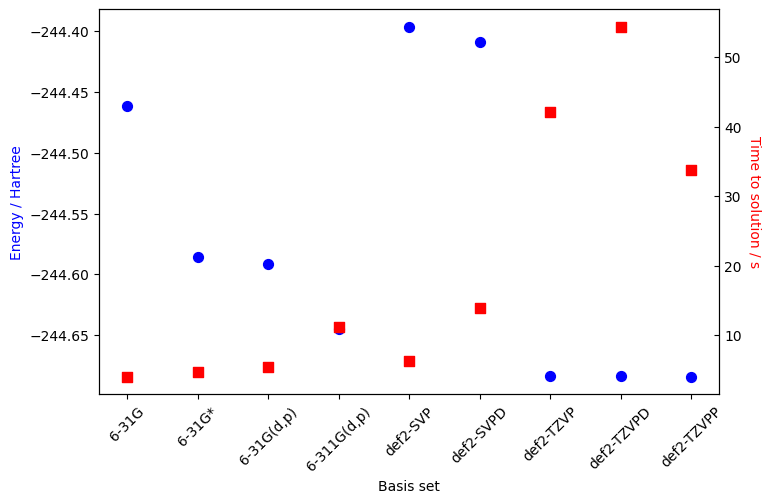

In [45]:
import matplotlib.pyplot as plt

# Create the matplotlib figure
fig, ax = plt.subplots(figsize=(8,5))

# Plot the energies.
ax.set_xticks(range(len(basis_sets)), basis_sets, rotation=45)
ax.set_xlabel("Basis set")
ax.set_ylabel("Energy / Hartree", color="b")
ax.scatter(range(len(basis_sets)), mf_energies, marker="o", s=50, color="b")

# Plot the time to solution
ax_time = ax.twinx()
ax_time.scatter(range(len(basis_sets)), mf_times, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution / s", color="r", rotation=270, va="bottom")

# Show the graph
plt.tick_params(axis="both", direction="in")
plt.show()

In [46]:
print(f'Le nombre total d\'électrons est {mol_pyscf.nelectron} et le nombre total d\'électrons (alpha, béta) est {mol_pyscf.nelec}')
print(f'Le nombre d\'orbitales atomiques, dans la base {mol_pyscf.basis}, est {mol_pyscf.nao_nr()}')
print(f'L\'énergie nucléaire vaut {mol_pyscf.energy_nuc()} Hartrees')

Le nombre total d'électrons est 36 et le nombre total d'électrons (alpha, béta) est (18, 18)
Le nombre d'orbitales atomiques, dans la base def2-TZVPP, est 197
L'énergie nucléaire vaut 163.6585712480624 Hartrees


## Calculons l'energie Hartree-Fock (HF)

In [47]:
from pyscf import scf

In [48]:
import time
start_hf = time.time()
myhf = scf.RHF(mol_pyscf).run()
hf_energy = myhf.e_tot
hf_time = time.time() - start_hf

print("Énergie totale HF :", hf_energy)
print("Temps de calcul HF :", hf_time, "secondes")


converged SCF energy = -244.684380136342
Énergie totale HF : -244.68438013634199
Temps de calcul HF : 94.72959351539612 secondes


In [49]:
myhf.mo_occ #- Occupation MO (vecteur de longueur égale au nombre de MO)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [50]:
lumo_idx = myhf.mo_occ.tolist().index(0.)
homo_idx = lumo_idx - 1
print(f'Les indexes du (HOMO,LUMO) sont {homo_idx,lumo_idx}')

Les indexes du (HOMO,LUMO) sont (17, 18)


##   Calcul DFT

In [51]:
from pyscf import dft

In [ ]:
start_myks = time.time()
myks = dft.RKS(mol_pyscf, xc="B3LYP").run()
myks_time = time.time() - start_myks

print("Énergie totale DFT :", myks.e_tot)
print("Temps de calcul DFT :", myks_time, "secondes")

/home/aissatou/mambaforge/lib/python3.10/site-packages/pyscf/dft/libxc.py:1102: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '
